DATASET: https://www.kaggle.com/datasets/mariumfaheem666/spam-sms-classification-using-nlp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Spam_SMS.csv')

In [3]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Class', ylabel='count'>

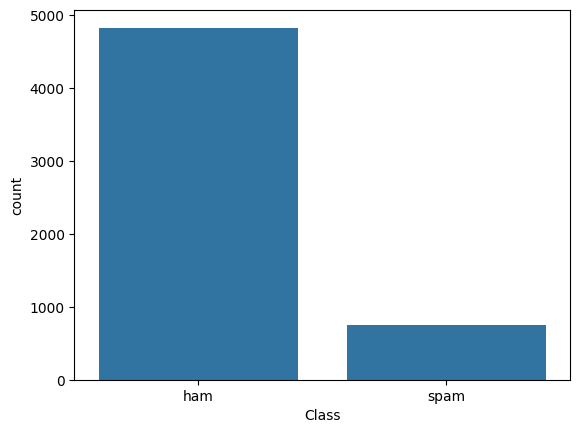

In [4]:
sns.countplot(data=df, x='Class')

In [5]:
df.isna().sum()

Class      0
Message    0
dtype: int64

In [7]:
df['Message'].str.isspace().sum()

0

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# help(CountVectorizer)

In [11]:
cv = CountVectorizer(stop_words='english')

In [17]:
matrix = cv.fit_transform(df[df['Class'] == 'spam']['Message'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for spam in sms')
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for spam sms
[('free', 224), ('txt', 163), ('ur', 144), ('mobile', 127), ('text', 125), ('stop', 123), ('claim', 113), ('reply', 104), ('www', 98), ('prize', 93), ('just', 79), ('cash', 76), ('won', 76), ('uk', 74), ('150p', 71), ('send', 71), ('new', 69), ('nokia', 67), ('win', 64), ('urgent', 63)]


In [18]:
matrix = cv.fit_transform(df[df['Class'] == 'ham']['Message'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for ham in sms')
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for ham in sms
[('gt', 318), ('lt', 316), ('just', 297), ('ok', 288), ('ll', 266), ('ur', 247), ('know', 237), ('good', 235), ('like', 234), ('got', 233), ('come', 230), ('day', 212), ('love', 205), ('time', 202), ('going', 169), ('home', 165), ('want', 165), ('lor', 162), ('don', 159), ('need', 159)]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df['Message']
y = df['Class']

In [22]:
# help(train_test_split)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [25]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [28]:
preds = pipe.predict(X_test)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1463
        spam       0.99      0.90      0.94       210

    accuracy                           0.99      1673
   macro avg       0.99      0.95      0.97      1673
weighted avg       0.99      0.99      0.99      1673



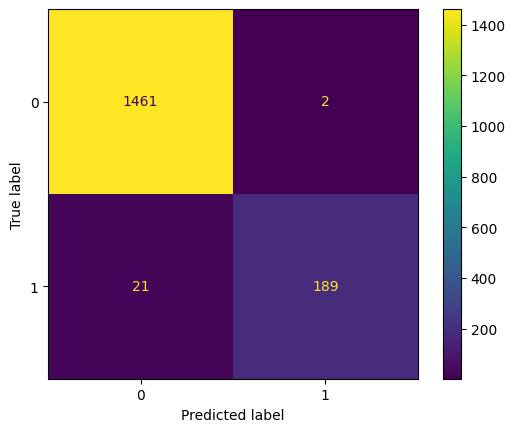

In [32]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
cm.plot()

In [46]:
message = 'Hi, Xfinity here! Please provide feedback on your most recent experience with Xfinity.Thinking about your online interaction, how likely are you to recommend Xfinity to friends & family? Reply from 0 Not at all Likely to 10 Extremely Likely.Msg&DataRatesApply. STOP to end survey msgs.'

In [47]:
pipe.predict([message])

array(['ham'], dtype=object)